### Insights Solar Power Generation India

Power Generation transforms to renewable energy and solar power generation has a major stake in this transformation. To gain some insights in solar power generation, respective data from India gathered over 34 days will be analysed. Aim is to answer the following questions:

    1. Which time of the day has the highest average generation volume?
    2. Is it possible to forcast the generation and how good is the forecast?
    3. How is the correlation between generation, temperature and irradiation?
 
 
### Exploring the Data

In [122]:
# Import necessary libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns; sns.set()


# Pretty display for notebooks
%matplotlib inline

# Load the generation datasets
plant1_gen = pd.read_csv("Plant_1_Generation_Data.csv")
plant1_weather = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')


> **Understand the generation data**

In [123]:
# function to explore datasets
def data_exploration(df_explore):
    """
    Description: Function can be used for a first exploration of a dataset. 
    
    It displays the first rows, infos about data types, number of columns and rows as well as statistical information. 


    Arguments:
        Dataset: the dataset to be explored.

    Returns:
        None
    """
    
    print('Display of the first 5 rows for the dataset:')
    print(df_explore.head())
    print()
    print('---------------------------------------------------------------------')
    print()
    print('Infos about data types, number of columns and rows:')
    print(df_explore.info())
    print()
    print('---------------------------------------------------------------------')
    print()
    print('Statistics for the dataset:')
    print(df_explore.describe())
    

In [124]:
# Explore the generation dataset by applying the function data_exploration
data_exploration(plant1_gen)

Display of the first 5 rows for the dataset:
          DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0  

---------------------------------------------------------------------

Infos about data types, number of columns and rows:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
DATE_TIME      68778 non-null object
PLANT_ID       68778 non-null int64
SOURCE_KEY     68778 non-null object
DC_POWER    

In [125]:
# Display samples
plant1_gen.sample(10)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
11442,20-05-2020 19:00,4135001,zBIq5rxdHJRwDNY,0.000000,0.000000,8891.000000,6380862.000
33809,01-06-2020 07:45,4135001,rGa61gmuvPhdLxV,4808.714286,471.628571,352.285714,7236684.286
67723,17-06-2020 12:00,4135001,1IF53ai7Xc0U56Y,11748.250000,1146.487500,2877.125000,6430409.125
61500,14-06-2020 12:45,4135001,McdE0feGgRqW7Ca,7981.750000,781.275000,3988.750000,7385911.750
29678,30-05-2020 08:45,4135001,pkci93gMrogZuBj,3486.285714,342.728571,569.857143,7282104.857
21937,26-05-2020 07:00,4135001,zVJPv84UY57bAof,1763.857143,172.785714,77.714286,7197686.714
57140,12-06-2020 11:15,4135001,1BY6WEcLGh8j5v7,8295.428571,811.757143,1793.714286,6452031.714
17499,24-05-2020 04:00,4135001,z9Y9gH1T5YWrNuG,0.000000,0.000000,0.000000,7072762.000
41476,05-06-2020 00:00,4135001,wCURE6d3bPkepu2,0.000000,0.000000,0.000000,6939021.000
19810,25-05-2020 07:00,4135001,WRmjgnKYAwPKWDb,1854.142857,181.757143,79.714286,7101196.714


In [126]:
# Display sum per column
plant1_gen.sum()

DATE_TIME      15-05-2020 00:0015-05-2020 00:0015-05-2020 00:...
PLANT_ID                                            284397098778
SOURCE_KEY     1BY6WEcLGh8j5v71IF53ai7Xc0U56Y3PZuoBAID5Wc2HD7...
DC_POWER                                             2.16474e+08
AC_POWER                                             2.11701e+07
DAILY_YIELD                                           2.2669e+08
TOTAL_YIELD                                          4.79982e+11
dtype: object

> **Understand the weather data**

In [127]:
# Explore the generation dataset by applying the function data_exploration
data_exploration(plant1_weather)

Display of the first 5 rows for the dataset:
             DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.761668          0.0  
2           22.592306          0.0  
3           22.360852          0.0  
4           22.165423          0.0  

---------------------------------------------------------------------

Infos about data types, number of columns and rows:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
DATE_TIME              3182 non-null object
PLANT_ID      

In [128]:
# Display samples
plant1_weather.sample(10)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
2348,2020-06-09 07:30:00,4135001,HmiyD2TTLFNqkNe,23.595209,28.269993,0.237298
2485,2020-06-10 17:45:00,4135001,HmiyD2TTLFNqkNe,25.690484,27.858786,0.082662
782,2020-05-23 19:15:00,4135001,HmiyD2TTLFNqkNe,27.588753,25.794478,0.000000
1636,2020-06-01 21:15:00,4135001,HmiyD2TTLFNqkNe,23.468129,20.998059,0.000000
2012,2020-06-05 19:30:00,4135001,HmiyD2TTLFNqkNe,24.760622,22.101622,0.000000
1191,2020-05-28 01:45:00,4135001,HmiyD2TTLFNqkNe,22.431586,20.403196,0.000000
2621,2020-06-12 03:45:00,4135001,HmiyD2TTLFNqkNe,22.117505,21.455585,0.000000
2220,2020-06-07 23:30:00,4135001,HmiyD2TTLFNqkNe,23.321769,22.170496,0.000000
274,2020-05-17 23:15:00,4135001,HmiyD2TTLFNqkNe,21.216575,20.635392,0.000000
3044,2020-06-16 13:30:00,4135001,HmiyD2TTLFNqkNe,28.401005,45.513633,0.582289


In [129]:
# Display sum per column
plant1_weather.sum()

DATE_TIME              2020-05-15 00:00:002020-05-15 00:15:002020-05-...
PLANT_ID                                                     13157573182
SOURCE_KEY             HmiyD2TTLFNqkNeHmiyD2TTLFNqkNeHmiyD2TTLFNqkNeH...
AMBIENT_TEMPERATURE                                              81241.6
MODULE_TEMPERATURE                                               98931.6
IRRADIATION                                                      726.491
dtype: object

> **Findings:**    

Qualtity:   
    - redundant data: each dataset has a column 'PLANT_ID', which contains just the same ID. The column is not needed for analysis.     
    - missing values: None of the variables includes NaNs. There is no missing data: the columns in each dataset have the same number of rows. However, the number of rows in generation data (68,778) is significant higher than in weather data (3,182); generation data seems to have a more detailed time listing  
    - different format: the columns DATE_Time are formatted in a different way and the data type in both datasets is object instead date time.


### Data preparation

In [130]:
# Convert format of Date_Time columns from object to datetime
plant1_gen['DATE_TIME'] = pd.to_datetime(plant1_gen['DATE_TIME'], format = '%d-%m-%Y %H:%M')
plant1_gen.head(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [131]:
# Convert format of Date_Time columns from object to datetime as well for the weather dataset
plant1_weather['DATE_TIME'] = pd.to_datetime(plant1_weather['DATE_TIME'])
plant1_weather.sample(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
1940,2020-06-05 01:30:00,4135001,HmiyD2TTLFNqkNe,22.069800,19.270368,0.000000
693,2020-05-22 19:45:00,4135001,HmiyD2TTLFNqkNe,26.941038,25.366803,0.000000
1655,2020-06-02 02:00:00,4135001,HmiyD2TTLFNqkNe,21.683179,19.743534,0.000000
2152,2020-06-07 06:30:00,4135001,HmiyD2TTLFNqkNe,22.062724,21.586833,0.056334
1114,2020-05-27 06:30:00,4135001,HmiyD2TTLFNqkNe,23.340881,22.568992,0.060636


In [132]:
# Drop redundant columnns in generation dataset
df_gen = plant1_gen
df_gen.drop(['PLANT_ID'], axis = 1, inplace = True)
df_gen.columns

Index(['DATE_TIME', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD',
       'TOTAL_YIELD'],
      dtype='object')

In [133]:
# Drop redundant columnns in weather dataset
df_weather = plant1_weather
df_weather.drop(['PLANT_ID'], axis = 1, inplace = True)
df_weather.columns

Index(['DATE_TIME', 'SOURCE_KEY', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION'],
      dtype='object')

In [134]:
# Summarize the generation data on level of a quarterly hour
df_gen_2 = df_gen.groupby(['DATE_TIME']).sum()
df_gen_2.head(50)
df_gen_2.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3158 entries, 2020-05-15 00:00:00 to 2020-06-17 23:45:00
Data columns (total 4 columns):
DC_POWER       3158 non-null float64
AC_POWER       3158 non-null float64
DAILY_YIELD    3158 non-null float64
TOTAL_YIELD    3158 non-null float64
dtypes: float64(4)
memory usage: 123.4 KB


In [135]:
# Check if the sum of the columns is still identical
df_gen_2.sum()

DC_POWER       2.164737e+08
AC_POWER       2.117006e+07
DAILY_YIELD    2.266901e+08
TOTAL_YIELD    4.799818e+11
dtype: float64

In [136]:
# Merge generation and weather data
df_plant1 = pd.merge(df_gen_2, df_weather, on=['DATE_TIME'], how = 'left')
df_plant1.sum()

DC_POWER               2.164737e+08
AC_POWER               2.117006e+07
DAILY_YIELD            2.266901e+08
TOTAL_YIELD            4.799818e+11
AMBIENT_TEMPERATURE    8.069373e+04
MODULE_TEMPERATURE     9.842091e+04
IRRADIATION            7.264357e+02
dtype: float64

In [137]:
df_plant1 = df_plant1.dropna(axis = 0)
df_plant1.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,0.0,0.0,0.0,143581676.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,0.0,0.0,0.0,143581676.0,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,0.0,0.0,0.0,143581676.0,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,0.0,0.0,0.0,143581676.0,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,0.0,0.0,0.0,150761642.0,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [138]:
# Extract the hour
df_plant1['Time'] = df_plant1['DATE_TIME'].dt.time
df_plant1.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,Time
0,2020-05-15 00:00:00,0.0,0.0,0.0,143581676.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,00:00:00
1,2020-05-15 00:15:00,0.0,0.0,0.0,143581676.0,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,00:15:00
2,2020-05-15 00:30:00,0.0,0.0,0.0,143581676.0,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,00:30:00
3,2020-05-15 00:45:00,0.0,0.0,0.0,143581676.0,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,00:45:00
4,2020-05-15 01:00:00,0.0,0.0,0.0,150761642.0,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0,01:00:00


In [139]:
df_plant1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3157 entries, 0 to 3157
Data columns (total 10 columns):
DATE_TIME              3157 non-null datetime64[ns]
DC_POWER               3157 non-null float64
AC_POWER               3157 non-null float64
DAILY_YIELD            3157 non-null float64
TOTAL_YIELD            3157 non-null float64
SOURCE_KEY             3157 non-null object
AMBIENT_TEMPERATURE    3157 non-null float64
MODULE_TEMPERATURE     3157 non-null float64
IRRADIATION            3157 non-null float64
Time                   3157 non-null object
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 271.3+ KB


### Data Modelling

> **Question 1:**  Which time of the day has the highest average generation volume?  

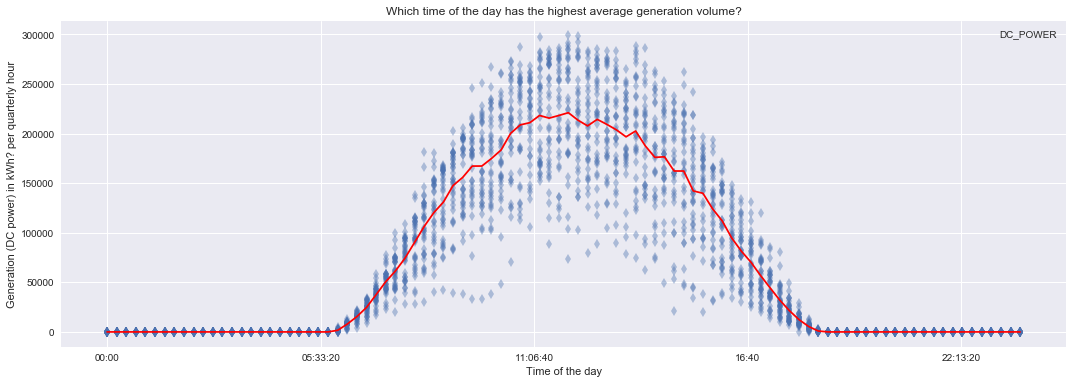

In [140]:
# Display the (average) generation per hour
df_plant1.plot(x = 'Time', y = 'DC_POWER', figsize = (18,6), style = 'd', alpha = 0.4)

df_plant1.groupby('Time')['DC_POWER'].mean().plot(color = 'r')

plt.title('Which time of the day has the highest average generation volume?')
plt.xlabel('Time of the day')
plt.ylabel('Generation (DC power) in kWh? per quarterly hour')
plt.show()

In [141]:
df_max = df_plant1.groupby('Time')['DC_POWER'].mean()
df_max.max()

221034.06168884857

In [142]:
df_max.describe()

count        96.000000
mean      67298.810202
std       83359.326943
min           0.000000
25%           0.000000
50%        6715.092502
75%      149611.720063
max      221034.061689
Name: DC_POWER, dtype: float64

> **Question 2:**   Is it possible to forcast the generation and how good is the forecast?

In [143]:
#Convert time to integer
df_plant1['Hour'] = df_plant1['DATE_TIME'].dt.hour
df_plant1['Minutes'] = df_plant1['DATE_TIME'].dt.minute
df_plant1['Day_time'] = df_plant1['Hour'] + df_plant1['Minutes'] / 60

df_plant1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3157 entries, 0 to 3157
Data columns (total 13 columns):
DATE_TIME              3157 non-null datetime64[ns]
DC_POWER               3157 non-null float64
AC_POWER               3157 non-null float64
DAILY_YIELD            3157 non-null float64
TOTAL_YIELD            3157 non-null float64
SOURCE_KEY             3157 non-null object
AMBIENT_TEMPERATURE    3157 non-null float64
MODULE_TEMPERATURE     3157 non-null float64
IRRADIATION            3157 non-null float64
Time                   3157 non-null object
Hour                   3157 non-null int64
Minutes                3157 non-null int64
Day_time               3157 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(2), object(2)
memory usage: 345.3+ KB


In [144]:
#Split into explanatory and response variables
X = df_plant1[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'Day_time']].astype(float).round(2)
y = df_plant1['DC_POWER'].astype(float).round(2)


In [145]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize = True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was 0.9935673305567002 on 948 values.'

> **Question 3:**   How is the correlation between generation, temperature and irradiation?

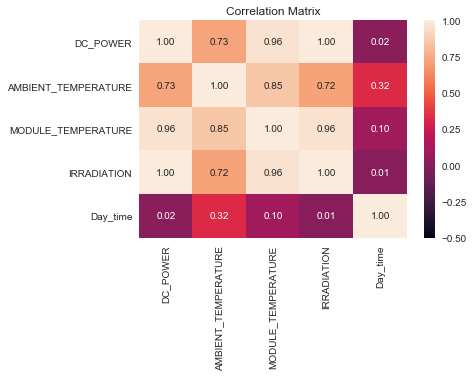

In [146]:
#Display a heatmap reflecting the correlations
df_corr = df_plant1[['DC_POWER','AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'Day_time']].astype(float).round(2)
ax = sns.heatmap(df_corr.corr(), annot = True, fmt=".2f", vmin = -0.5)
ax.set_title('Correlation Matrix')
plt.show()

### Evaluation of Results

In [147]:
#See blog post

### Sources

Analysed data:   
https://www.kaggle.com/anikannal/solar-power-generation-data    
Extraction of date / times:    
https://stackoverflow.com/questions/41918115/how-do-i-extract-the-date-year-month-from-pandas-dataframe    
